# **Import data**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **Data clean**

Missing value.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum().sort_values

<bound method Series.sort_values of InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64>

In [ ]:
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Add variables.

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

df['CustomerID'].astype('object')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Hour'] = df['InvoiceDate'].dt.hour
df["Week"] = df['InvoiceDate'].dt.week
df["Weekday"] = df['InvoiceDate'].dt.weekday
df['Month'] = df['InvoiceDate'].dt.month
df["Quarter"] = df['InvoiceDate'].dt.quarter
df["Year"] = df['InvoiceDate'].dt.year
df["Dayofyear"] = df['InvoiceDate'].dt.dayofyear

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Sales,Hour,Week,Weekday,Month,Quarter,Year,Dayofyear
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854,12.737472,30.936184,2.606402,7.605947,2.854160,2010.934002,215.225692
std,248.693370,69.315162,1713.600303,427.591718,2.284952,14.765548,1.921907,3.418942,1.122363,0.248279,103.470584
min,-80995.000000,0.000000,12346.000000,-168469.600000,6.000000,1.000000,0.000000,1.000000,1.000000,2010.000000,4.000000
25%,2.000000,1.250000,13953.000000,4.200000,11.000000,19.000000,1.000000,5.000000,2.000000,2011.000000,130.000000
50%,5.000000,1.950000,15152.000000,11.100000,13.000000,34.000000,2.000000,8.000000,3.000000,2011.000000,240.000000
75%,12.000000,3.750000,16791.000000,19.500000,14.000000,44.000000,4.000000,11.000000,4.000000,2011.000000,310.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,20.000000,51.000000,6.000000,12.000000,4.000000,2011.000000,357.000000


# **Exploratory data analysis(EDA)**

Find the top 10 returns.

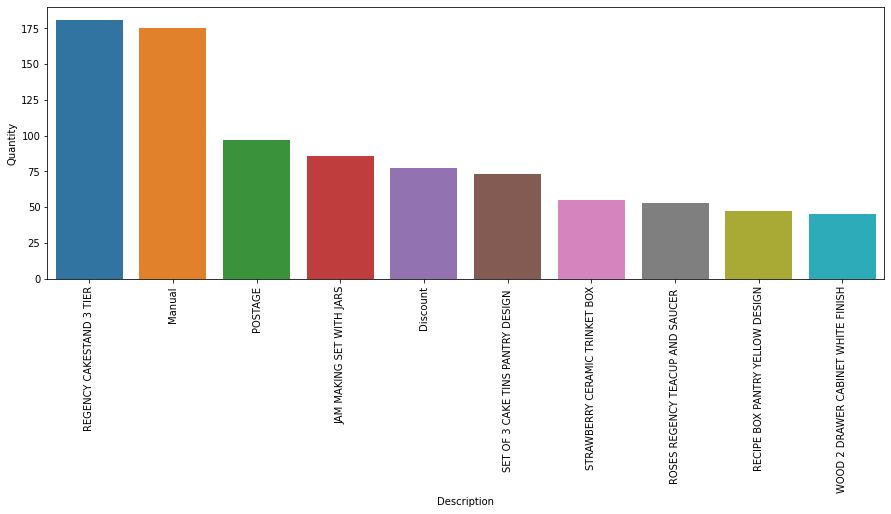

In [ ]:
refunds = df[df['Quantity']<0]
refunds = refunds.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
sns.barplot(x= refunds['Description'], y=refunds['Quantity'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
list_special = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [ ]:
df = df[~df['StockCode'].isin(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'])]

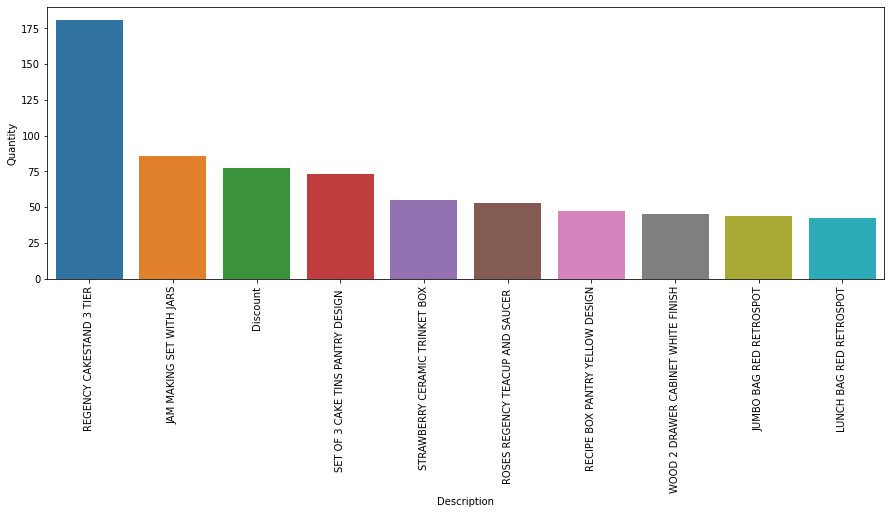

In [ ]:
refunds = df[df['Quantity']<0]
refunds = refunds.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
sns.barplot(x= refunds['Description'], y=refunds['Quantity'])
plt.xticks(rotation=90)
plt.show()

return time

In [ ]:
refunds_day = df[df['Quantity']<0]

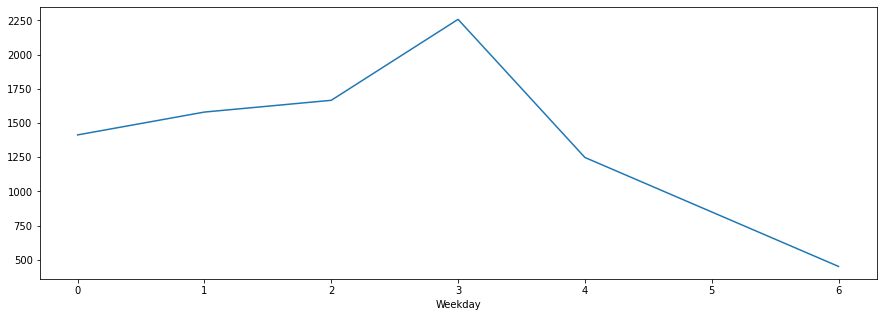

In [ ]:
week = refunds_day.groupby('Weekday')['Quantity'].count()
plt.figure(figsize=(15,5))
week.plot()
plt.show()

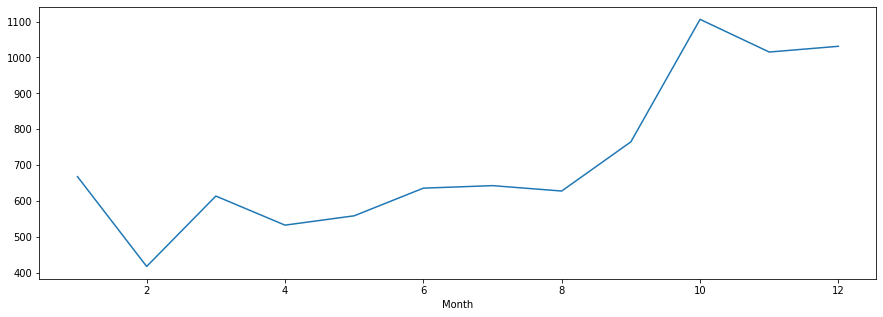

In [ ]:
month = refunds_day.groupby('Month')['Quantity'].count()
plt.figure(figsize=(15,5))
month.plot()
plt.show()

In [ ]:
Giveaway = df[df['UnitPrice']==0]
Giveaway.shape

(33, 16)

In [ ]:
df = df[df['UnitPrice']>0]
df.shape

(404953, 16)

In [ ]:
Refund = df[df['InvoiceNo'].str.startswith('C')]
Refund.shape

(8616, 16)

In [ ]:
df = df[~df['InvoiceNo'].str.startswith('C')]

In [ ]:
df.shape

(396337, 16)

Buy the top 10 items.

In [ ]:
df[['Quantity', 'UnitPrice', 'Sales']].describe()

,Quantity,UnitPrice,Sales
count,396337.000000,396337.000000,396337.000000
mean,13.012547,2.868222,22.105094
std,179.641245,4.264663,308.899121
min,1.000000,0.040000,0.060000
25%,2.000000,1.250000,4.680000
50%,6.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,649.500000,168469.600000


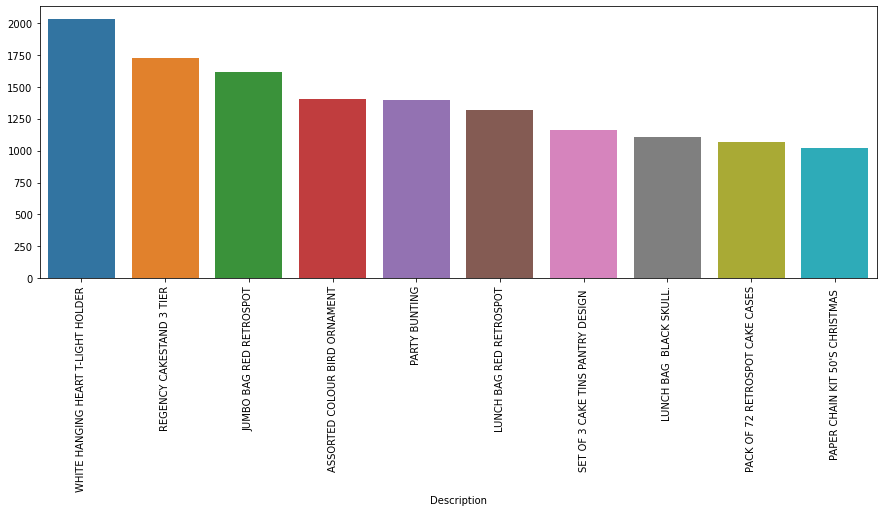

In [ ]:
top_purchase = df.groupby('Description')['Quantity'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(15,5))
sns.barplot(x=top_purchase.index, y=top_purchase.values)
plt.xticks(rotation=90)
plt.show()

Country distribution of purchases.

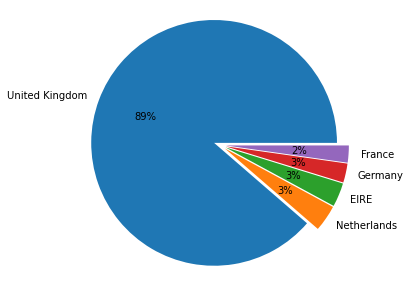

In [ ]:
country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)[:10]
labels = country[:5].index
size = country[:5].values

plt.figure(figsize=(5,5))
plt.pie(size, labels=labels, explode=[0.05]*5, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

In [ ]:
df['Country_UK'] = df['Country'].apply(lambda x:"uk" if "United Kingdom" == x else "no_uk")

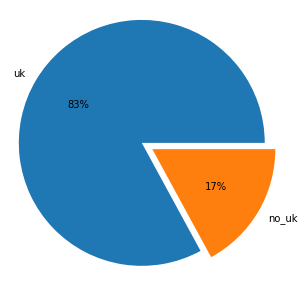

In [ ]:
country = df.groupby('Country_UK')['Sales'].sum().sort_values(ascending=False)[:10]
labels = country[:].index
size = country[:].values

plt.figure(figsize=(5,5))
plt.pie(size, labels=labels,explode=[0.05]*2, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

Time distribution of purchases.

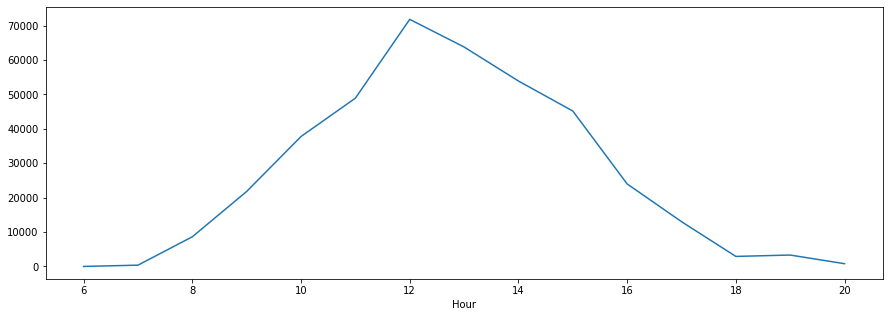

In [ ]:
hour = df.groupby('Hour')['Quantity'].count()
plt.figure(figsize=(15,5))
hour.plot()
plt.show()

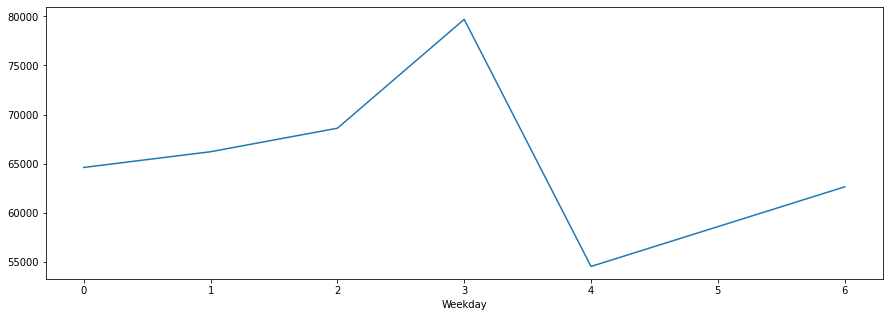

In [ ]:
week = df.groupby('Weekday')['Quantity'].count()
plt.figure(figsize=(15,5))
week.plot()
plt.show()

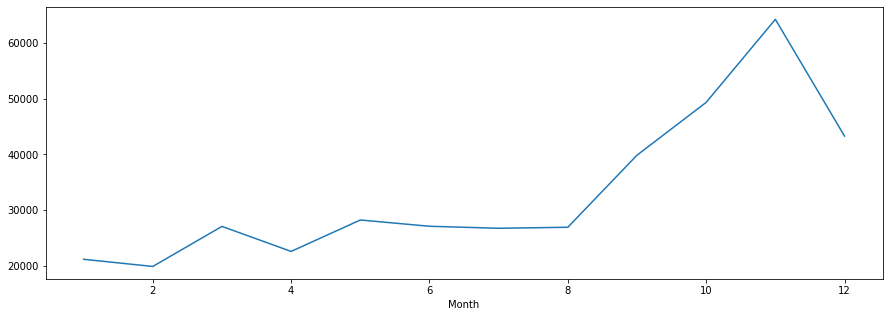

In [ ]:
month = df.groupby('Month')['Quantity'].count()
plt.figure(figsize=(15,5))
month.plot()
plt.show()

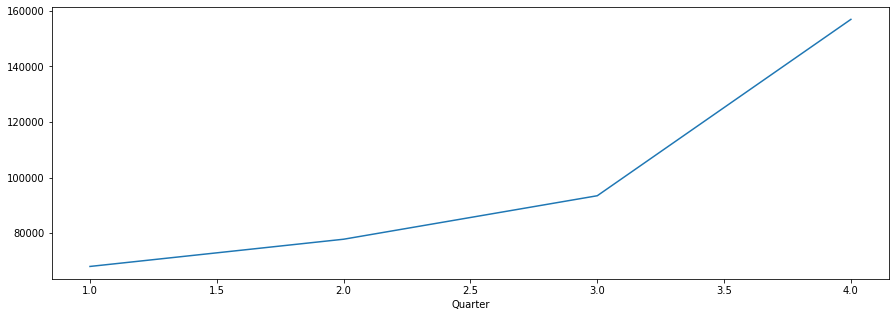

In [ ]:
Quarter = df.groupby('Quarter')['Quantity'].count()
plt.figure(figsize=(15,5))
Quarter.plot()
plt.show()

# **RFM Analysis**

In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
now = dt.date(2011,12,9)
now

datetime.date(2011, 12, 9)

In [ ]:
df = df[df["Country_UK"]=="uk"]
df['CustomerID'] = df['CustomerID'].astype(object)
df['date'] = pd.DatetimeIndex(df['InvoiceDate']).date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Hour,Week,Weekday,Month,Quarter,Year,Dayofyear,Country_UK,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,48,2,12,4,2010,335,uk,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,48,2,12,4,2010,335,uk,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,48,2,12,4,2010,335,uk,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,48,2,12,4,2010,335,uk,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,48,2,12,4,2010,335,uk,2010-12-01


Recency

In [ ]:

R_df = df.groupby(by='CustomerID', as_index=False)['date'].max()
R_df.columns = ['CustomerID','LastDate']
R_df.head()

,CustomerID,LastDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [ ]:
R_df['Recency'] = R_df['LastDate'].apply(lambda x: (now - x).days)
R_df.drop('LastDate',axis=1,inplace=True)
R_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


Frequency

In [ ]:
F_df = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
F_df.columns = ['CustomerID','Frequency']
F_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4580
3,12749.0,198
4,12820.0,59


Monetary

In [ ]:
M_df = df.groupby(by='CustomerID',as_index=False).agg({'Sales':'sum'})
M_df.columns = ['CustomerID','Monetary']
M_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,32317.32
3,12749.0,4040.88
4,12820.0,942.34


RFM

In [ ]:
RF_df = R_df.merge(F_df,on='CustomerID')
RFM_df = RF_df.merge(M_df,on='CustomerID')
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4580,32317.32
3,12749.0,3,198,4040.88
4,12820.0,3,59,942.34


In [ ]:
# 利用四分位距建立組別
quantiles = RFM_df.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14207.50,17.0,17.00,299.535
0.50,15567.50,50.0,41.00,650.470
0.75,16913.25,143.0,99.25,1571.450


In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
RFM_df['R'] = RFM_df['Recency'].apply(RScore, args=('Recency',quantiles,))
RFM_df['F'] = RFM_df['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
RFM_df['M'] = RFM_df['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,4
1,12747.0,2,103,4196.01,4,4,4
2,12748.0,0,4580,32317.32,4,4,4
3,12749.0,3,198,4040.88,4,4,4
4,12820.0,3,59,942.34,4,3,3


In [ ]:
RFM_df['Group'] = RFM_df['R'].apply(str) + RFM_df['F'].apply(str) + RFM_df['M'].apply(str)
RFM_df["Score"] = RFM_df[['R', 'F', 'M']].sum(axis=1)
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12747.0,2,103,4196.01,4,4,4,444,12
2,12748.0,0,4580,32317.32,4,4,4,444,12
3,12749.0,3,198,4040.88,4,4,4,444,12
4,12820.0,3,59,942.34,4,3,3,433,10


Divided into 'Bronze', 'Silver', 'Gold', 'Platinum'.

In [ ]:
loyalty = ['Bronze', 'Silver', 'Gold', 'Platinum']
RFM_df['Loyalty_Level'] = pd.qcut(RFM_df['Score'], q=4, labels= loyalty)
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level
0,12346.0,325,1,77183.60,1,1,4,114,6,Silver
1,12747.0,2,103,4196.01,4,4,4,444,12,Platinum
2,12748.0,0,4580,32317.32,4,4,4,444,12,Platinum
3,12749.0,3,198,4040.88,4,4,4,444,12,Platinum
4,12820.0,3,59,942.34,4,3,3,433,10,Gold


In [ ]:
behaviour = RFM_df.groupby('Loyalty_Level')[['Recency', 'Frequency', 'Monetary', 'Score']].mean()
behaviour

,Recency,Frequency,Monetary,Score
Loyalty_Level,,,,
Bronze,190.069054,14.922421,259.085277,4.108269
Silver,88.696450,33.422277,779.017711,6.479804
Gold,46.619250,82.385009,1527.976678,8.986371
Platinum,12.875000,282.519947,6026.134455,11.542553


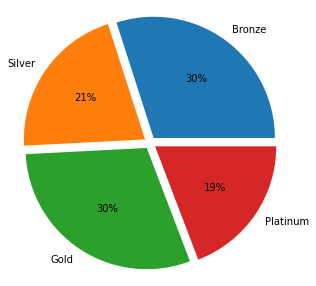

In [ ]:
AAA = RFM_df.groupby('Loyalty_Level')['Loyalty_Level'].count()
labels = AAA[:].index
size = AAA[:].values
plt.figure(figsize=(5,5))
plt.pie(size, labels=labels,explode=[0.05]*4, autopct='%1.0f%%')
plt.axis('equal')
plt.show()